Clean and Visualize this data and create some new features we can use to differentiate between games.

In [19]:
# dependencies
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [20]:
# load data
df = pd.read_csv('steam_data.csv')

# Clean data

correcting data types, removing unwanted values/texts

In [21]:
df.shape

(90000, 15)

In [22]:
df.drop_duplicates(inplace=True)
df.shape

(90000, 15)

In [23]:
df.head()

,title,hyperlink,is game,Genres,main_genre,sub_genre,price_in_rand,discount_price,discount_percent,release_date,reviews,tags,developer,publisher,game description
0,Counter-Strike: Global Offensive,https://store.steampowered.com/app/730/Counter...,All Games > Free to Play Games > Counter-Strik...,"['Action,', 'Free', 'to', 'Play']",Action,Free to play,No price,No price,NaN,"21 Aug, 2012","Very Positive 88% of the 6,545,979 user review...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...",Valve,Valve,About This Game Counter-Strike: Global Offensi...
1,Apex Legends™,https://store.steampowered.com/app/1172470/Ape...,All Games > Action Games > Apex Legends Offici...,"['Action,', 'Adventure,', 'Free', 'to', 'Play']",Action,Adventure,No price,No price,NaN,"4 Nov, 2020","Very Positive 86% of the 486,153 user reviews ...","['Free to Play', 'Multiplayer', 'Battle Royale...",Respawn Entertainment,Electronic Arts,About This Game Conquer with character in Apex...
2,Stray,https://store.steampowered.com/app/1332010/Str...,All Games > Adventure Games > Annapurna Intera...,"['Adventure,', 'Indie']",Adventure,Indie,195.00,195.00,NaN,"19 Jul, 2022","Overwhelmingly Positive 97% of the 56,406 user...","['Cats', 'Adventure', 'Cyberpunk', 'Cute', 'At...",BlueTwelve Studio,Annapurna Interactive,"About This Game Lost, alone and separated from..."
3,Grand Theft Auto V,https://store.steampowered.com/app/271590/Gran...,All Games > Action Games > Grand Theft Auto V,"['Action,', 'Adventure']",Action,Adventure,No price,No price,NaN,"13 Apr, 2015","Very Positive 85% of the 1,251,157 user review...","['Open World', 'Action', 'Multiplayer', 'Autom...",Rockstar North,Rockstar Games,"About This Game When a young street hustler, a..."
4,MultiVersus,https://store.steampowered.com/app/1818750/Mul...,All Games > Free to Play Games > MultiVersus,"['Action,', 'Free', 'to', 'Play']",Action,Free to play,No price,No price,NaN,"19 Jul, 2022","Very Positive 89% of the 42,353 user reviews f...","['Multiplayer', 'Co-op', '2D Fighter', 'Action...",Player First Games,Warner Bros. Games,About This Game CharactersChoose from Harley Q...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 89999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             89993 non-null  object
 1   hyperlink         90000 non-null  object
 2   is game           90000 non-null  object
 3   Genres            90000 non-null  object
 4   main_genre        90000 non-null  object
 5   sub_genre         90000 non-null  object
 6   price_in_rand     90000 non-null  object
 7   discount_price    90000 non-null  object
 8   discount_percent  5882 non-null   object
 9   release_date      82341 non-null  object
 10  reviews           90000 non-null  object
 11  tags              90000 non-null  object
 12  developer         82840 non-null  object
 13  publisher         75919 non-null  object
 14  game description  90000 non-null  object
dtypes: object(15)
memory usage: 11.0+ MB


In [25]:
# updating datatypes of columns 
def string_to_num(price):
    try:
        return np.float(price.replace(' ', ""))
    except:
        return 0


def discount_percent(amount):
    try:
        return int(''.join(filter(str.isdigit, amount)))
    except:
        return 0


def get_year(release_date):
    try:
        return int(release_date[-4:])
    except:
        return 0


def get_month(release_date):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    try:
        return [i for i in months if i in release_date][0]
    except:
        return 'no date'


def get_day(release_date):
    try:
        return int(release_date[:2])
    except:
        return 0


def percent_positive(review):
    if review == 'No reviews yet':
        return 0
    else:
        return int(re.findall("\d*%", review)[0][:-1])


def reviews_count(review):
    result = re.findall('(?<= the )(.*)(?= user )', review)
    if len(result) < 1:
        return 0
    else:
        return int(result[0].replace(',', ''))
    
    
def category(string):
    string = string.split('>')
    get_type = string[0].split()
    try:
        return get_type[1]
    except:
        return get_type


# def fix_sub_genre(genre):
#     if genre == 'Developer:':
#         return 'No genre given'
#     else:
#         return genre

In [26]:
# df.rename(columns={'Unnamed: 0':'index'}, inplace=True)
df['price_in_rand'] = df['price_in_rand'].apply(string_to_num)
df['discount_price'] = df['discount_price'].apply(string_to_num)
df['discount_percent'] = df['discount_percent'].apply(discount_percent)
df['release_year'] = df['release_date'].apply(get_year)
df['release_month'] = df['release_date'].apply(get_month)
df['release_day'] = df['release_date'].apply(get_day)
df['percent_of_reviews_positive'] = df['reviews'].apply(percent_positive)
df['number_of_reviews'] = df['reviews'].apply(reviews_count)
df['category'] = df['is game'].apply(category)
# df['sub_genre'] = df['sub_genre'].apply(fix_sub_genre)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 89999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        89993 non-null  object 
 1   hyperlink                    90000 non-null  object 
 2   is game                      90000 non-null  object 
 3   Genres                       90000 non-null  object 
 4   main_genre                   90000 non-null  object 
 5   sub_genre                    90000 non-null  object 
 6   price_in_rand                90000 non-null  float64
 7   discount_price               90000 non-null  float64
 8   discount_percent             90000 non-null  int64  
 9   release_date                 82341 non-null  object 
 10  reviews                      90000 non-null  object 
 11  tags                         90000 non-null  object 
 12  developer                    82840 non-null  object 
 13  publisher       

In [28]:
df.head()

,title,hyperlink,is game,Genres,main_genre,sub_genre,price_in_rand,discount_price,discount_percent,release_date,...,tags,developer,publisher,game description,release_year,release_month,release_day,percent_of_reviews_positive,number_of_reviews,category
0,Counter-Strike: Global Offensive,https://store.steampowered.com/app/730/Counter...,All Games > Free to Play Games > Counter-Strik...,"['Action,', 'Free', 'to', 'Play']",Action,Free to play,0.00000,0.00000,0,"21 Aug, 2012",...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",Valve,Valve,About This Game Counter-Strike: Global Offensi...,2012,Aug,21,88,6545979,Games
1,Apex Legends™,https://store.steampowered.com/app/1172470/Ape...,All Games > Action Games > Apex Legends Offici...,"['Action,', 'Adventure,', 'Free', 'to', 'Play']",Action,Adventure,0.00000,0.00000,0,"4 Nov, 2020",...,"['Free to Play', 'Multiplayer', 'Battle Royale...",Respawn Entertainment,Electronic Arts,About This Game Conquer with character in Apex...,2020,Nov,4,86,486153,Games
2,Stray,https://store.steampowered.com/app/1332010/Str...,All Games > Adventure Games > Annapurna Intera...,"['Adventure,', 'Indie']",Adventure,Indie,195.00000,195.00000,0,"19 Jul, 2022",...,"['Cats', 'Adventure', 'Cyberpunk', 'Cute', 'At...",BlueTwelve Studio,Annapurna Interactive,"About This Game Lost, alone and separated from...",2022,Jul,19,97,56406,Games
3,Grand Theft Auto V,https://store.steampowered.com/app/271590/Gran...,All Games > Action Games > Grand Theft Auto V,"['Action,', 'Adventure']",Action,Adventure,0.00000,0.00000,0,"13 Apr, 2015",...,"['Open World', 'Action', 'Multiplayer', 'Autom...",Rockstar North,Rockstar Games,"About This Game When a young street hustler, a...",2015,Apr,13,85,1251157,Games
4,MultiVersus,https://store.steampowered.com/app/1818750/Mul...,All Games > Free to Play Games > MultiVersus,"['Action,', 'Free', 'to', 'Play']",Action,Free to play,0.00000,0.00000,0,"19 Jul, 2022",...,"['Multiplayer', 'Co-op', '2D Fighter', 'Action...",Player First Games,Warner Bros. Games,About This Game CharactersChoose from Harley Q...,2022,Jul,19,89,42353,Games


In [29]:
# only keep the rows which are related to a game
df = df[df['category'] == 'Games']
df.reset_index(drop=True, inplace=True)

In [30]:
df.describe()

,price_in_rand,discount_price,discount_percent,release_year,release_day,percent_of_reviews_positive,number_of_reviews
count,77811.00000,77811.00000,77811.00000,77811.00000,77811.00000,77811.00000,77811.00000
mean,73.02274,70.76219,2.74937,2011.05808,15.90050,40.77779,963.45563
std,336.49881,335.97392,12.80296,121.10492,8.81672,40.38643,28082.27888
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,18.00000,18.00000,0.00000,2017.00000,8.00000,0.00000,0.00000
50%,42.00000,42.00000,0.00000,2019.00000,16.00000,44.00000,12.00000
75%,89.00000,85.00000,0.00000,2021.00000,23.00000,82.00000,63.00000
max,48000.00000,48000.00000,90.00000,2029.00000,31.00000,100.00000,6545979.00000


In [12]:
# save data as csv
df.to_csv('steam_game_data.csv')

# Explore data

In [13]:
df.shape

(77811, 21)

In [14]:
df['title'].nunique()

74815

In [135]:
from collections import Counter

# count genre tags
genres = []
for i in df['Genres']:
#     print(i.split(' '))
    if i == 'no genre given':
        genres.append(i)
    else:
        i = i.split(' ')
        for j in i:
            j = re.sub('\W+','', j)
            genres.append(j)
# count number of times each genre appears             
genres_counted = Counter(genres)
# create a tupple of each genre and the number it appears 
temp = []
for genre in genres_counted:
    temp.append((int(genres_counted[genre]), genre))
# create dictionary
genres_counted_dict = dict(map(reversed, temp))
# create a dataframe
g_tags_df = pd.DataFrame(genres_counted_dict.items(),columns=['genre', 'count'])

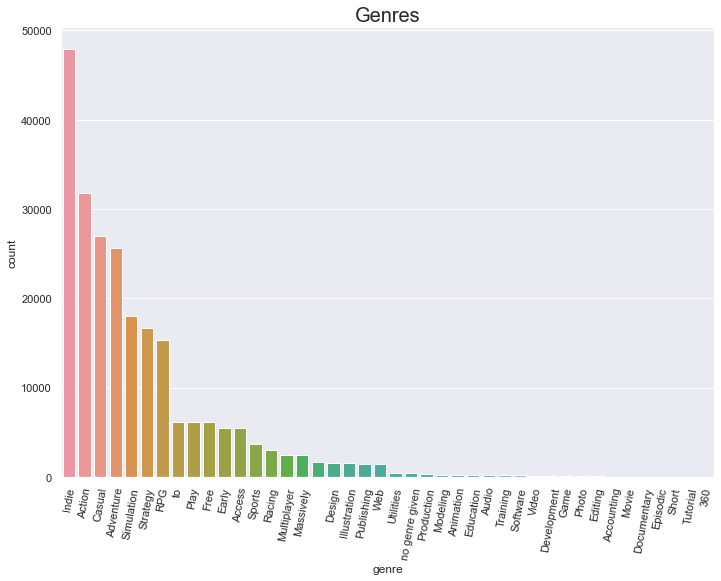

In [146]:
g_tags_df = g_tags_df.sort_values('count',ascending=False)
sns.barplot(data = g_tags_df, x='genre',y='count')
plt.xticks(rotation=80)
plt.title("Genres",fontsize=20)
# removes text appearing before the plot shows
plt.show()

C:\Users\Matthew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


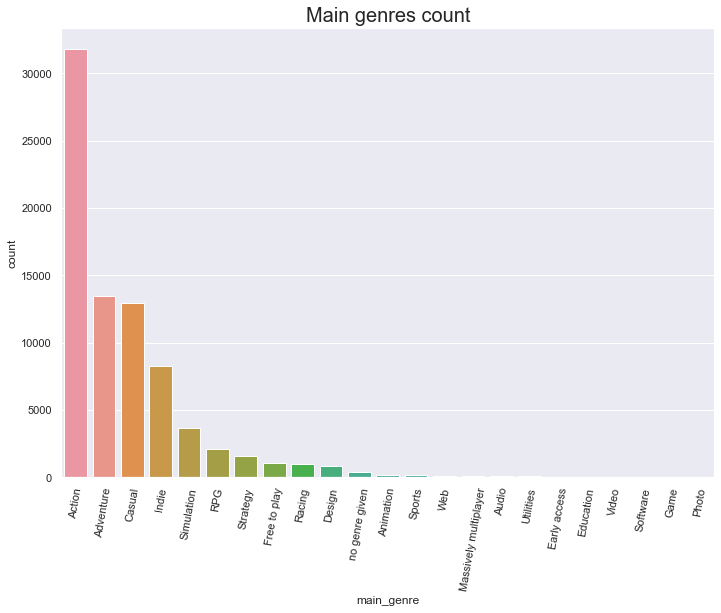

In [137]:
sns.countplot(df['main_genre'], order = df['main_genre'].value_counts().index)
plt.xticks(rotation=80)
plt.title("Main genres count",fontsize=20)
# removes text appearing before the plot shows
plt.show()

Lets drop the genres which have which have to little entries.

In [138]:
df['main_genre'].value_counts()

Action                   31800
Adventure                13444
Casual                   12932
Indie                     8273
Simulation                3631
RPG                       2128
Strategy                  1549
Free to play              1093
Racing                     954
Design                     861
no genre given             374
Animation                  199
Sports                     162
Web                        110
Massively multiplayer       97
Audio                       96
Utilities                   78
Early access                14
Education                    7
Video                        4
Software                     2
Game                         2
Photo                        1
Name: main_genre, dtype: int64

In [147]:
# df[df['main_genre']=='Software']

C:\Users\Matthew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


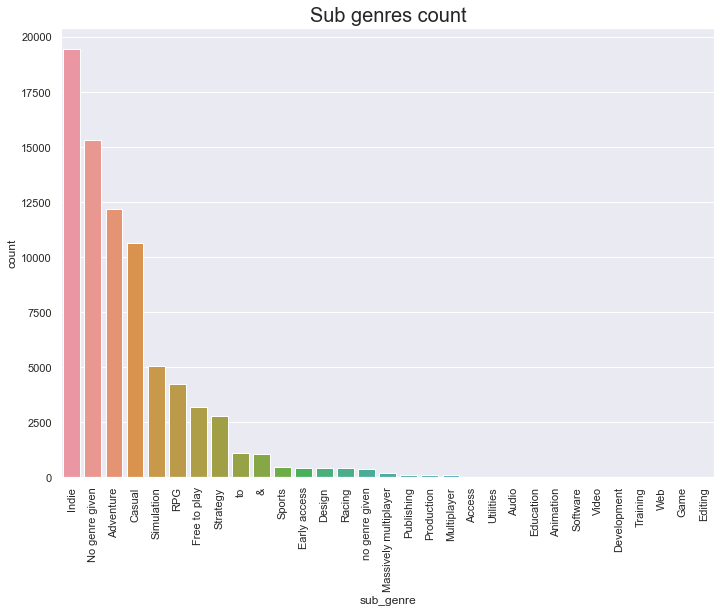

In [142]:
#
sns.countplot(df['sub_genre'], order = df['sub_genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Sub genres count",fontsize=20)
# removes text appearing before the plot shows
plt.show()

In [143]:
# df[df['sub_genre']=='&']

In [ ]:
# game prices

In [152]:
df['price_in_rand'].nunique()

858

C:\Users\Matthew\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_in_rand', ylabel='Density'>

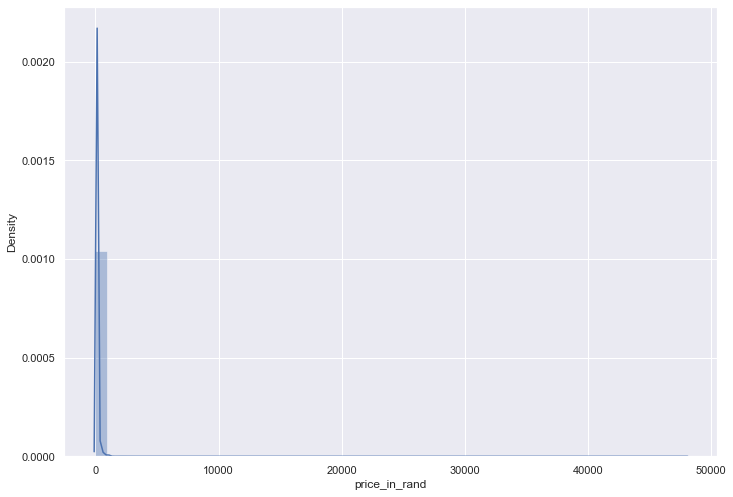

In [150]:
sns.distplot(df['price_in_rand'])

There are some expensive things on steam.

In [160]:
under_2k = df[df['price_in_rand'] < 2000]

C:\Users\Matthew\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_in_rand', ylabel='Density'>

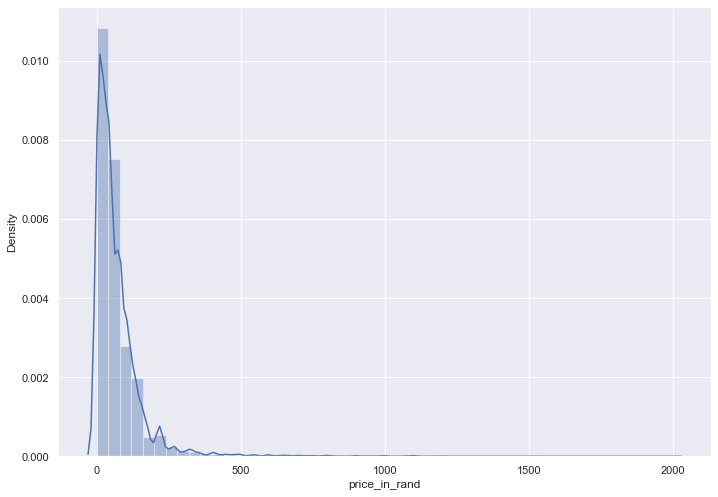

In [161]:
sns.distplot(under_2k['price_in_rand'])

C:\Users\Matthew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


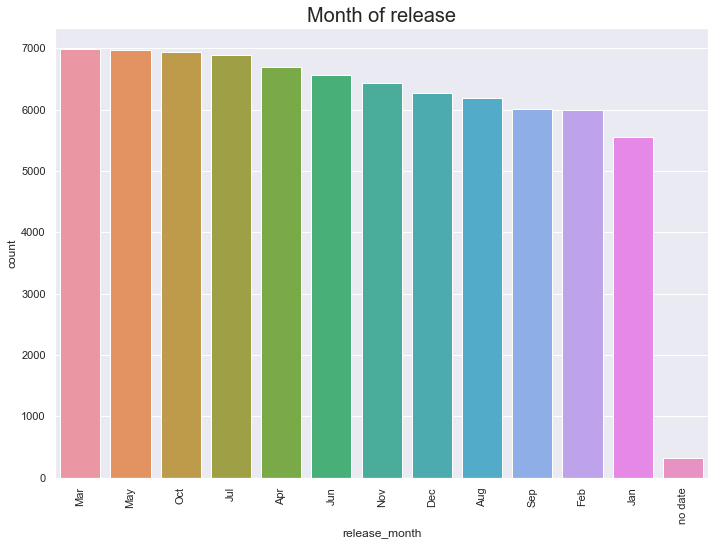

In [144]:
sns.countplot(df['release_month'], order = df['release_month'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Month of release",fontsize=20)
# removes text appearing before the plot shows
plt.show()

In [145]:
df[df['release_month']=='no date'].head(2)

,title,hyperlink,is game,Genres,main_genre,sub_genre,price_in_rand,discount_price,discount_percent,release_date,...,tags,developer,publisher,game description,release_year,release_month,release_day,percent_of_reviews_positive,number_of_reviews,category
195,Grand Theft Auto IV: Complete Edition,https://store.steampowered.com/app/901583/Gran...,All Games > Action Games > Grand Theft Auto IV...,"['Action,', 'Adventure']",Action,Adventure,0.0,0.00,0,NaN,...,"['Open World', 'Action', 'Automobile Sim', 'Mu...",Rockstar North,Rockstar Games,About This Game PLEASE NOTE: Microsoft no long...,0,no date,0,77,91608,Games
318,Don't Starve,https://store.steampowered.com/app/219740/Dont...,All Games > Indie Games > Klei Franchise > Don...,"['Adventure,', 'Indie,', 'Simulation']",Adventure,Indie,79.0,19.75,75,NaN,...,"['Survival', 'Open World Survival Craft', 'Cra...",Klei Entertainment,Klei Entertainment,About This Game Don’t Starve is an uncompromis...,0,no date,0,96,81011,Games


C:\Users\Matthew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


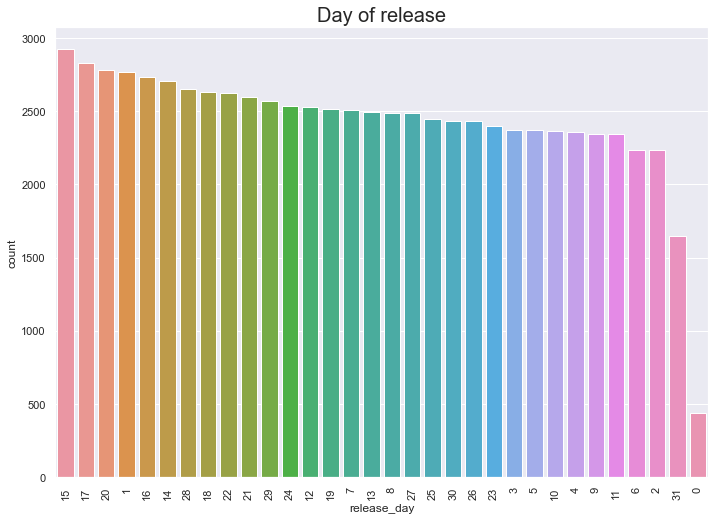

In [16]:
sns.countplot(df['release_day'], order = df['release_day'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Day of release",fontsize=20)
# removes text appearing before the plot shows
plt.show()

C:\Users\Matthew\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

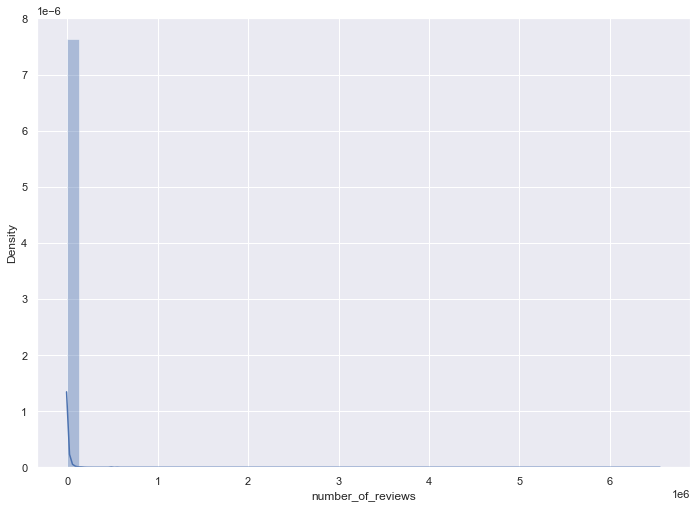

In [17]:
sns.distplot(df['number_of_reviews'])

In [ ]:
number_of_reviews

looking deeper into all the tags users have added to games.

In [179]:
# count genre tags
tags = []
for i in df['tags']:
    i = i.split(' ')
    for j in i:
        j = re.sub('\W+', '', j)
        tags.append(j)
# count number of times each genre appears
tags_counted = Counter(tags)
# create a tupple of each genre and the number it appears
temp = []
for tag in tags_counted:
    temp.append((int(tags_counted[tag]), tag))
# create dictionary
tags_dict = dict(map(reversed, temp))
# create a dataframe
tags = pd.DataFrame(tags_dict.items(), columns=['tag', 'count'])

In [181]:
tags.shape

(480, 2)

In [182]:
tags_sorted = tags.sort_values('count', ascending=False)

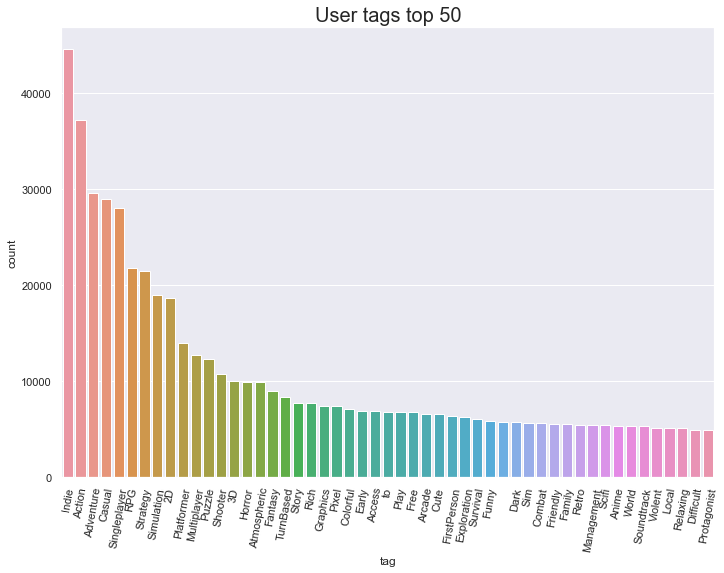

In [185]:
top_20 = tags_sorted.iloc[0:51]

sns.barplot(data = top_20, x='tag',y='count')
plt.xticks(rotation=80)
plt.title("User tags top 50",fontsize=20)
# removes text appearing before the plot shows
plt.show()

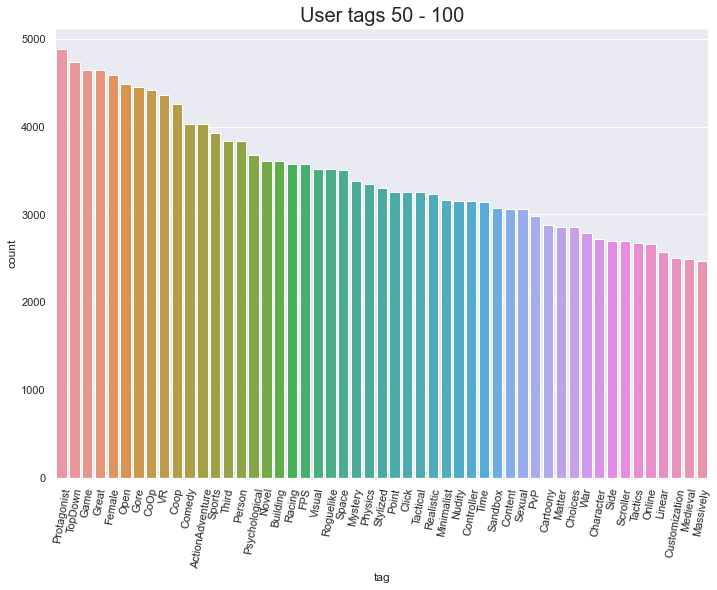

In [186]:
top_20 = tags_sorted.iloc[50:101]

sns.barplot(data = top_20, x='tag',y='count')
plt.xticks(rotation=80)
plt.title("User tags 50 - 100",fontsize=20)
# removes text appearing before the plot shows
plt.show()

In [189]:
tags_sorted.tail(50)

,tag,count
434,Transhumanism,79
366,Roguevania,77
218,Basketball,77
426,Electronic,75
187,Vikings,71
384,Mini,70
413,Lemmings,64
455,360,58
453,Tennis,56
432,Awkward,55


In [192]:
df = df[df['price_in_rand'] < 2000]
df.shape

(77794, 21)

In [193]:
# save data as csv
df.to_csv('steam_game_data.csv')